<h1><b>Titanic Survival Prediction Task Using Python</b></h1>

In this Jupyter Notebook, I will explore the Titanic dataset and aim to predict whether a passenger survived based on various features using logistic regression machine learning algorithmn. The Titanic dataset typically includes features like `PassengerId`, `Pclass`, `Name`, `Sex`, `Age`, `SibSp`, `Parch`, `Ticket`, `Fare`, `Cabin`, and `Embarked`.

<b style="font-family:Geneva; font-size:20px;">Columns Description:</b>

    1. `PassengerId`: A unique identifier assigned to each passenger.
    
    2. `Survived`: Indicates whether a passenger survived (1) or died (0).
    
    3. `Pclass`: Represents the passenger class, which can be a numerical or categorical value indicating the class of travel (e.g., first, second, or third class).
    
    4. `Name`: The name of the passenger.
    
    5. `Sex`: Represents the gender of the passenger, typically categorized as male or female.
    
    6. `Age`: The age of the passenger, often represented as a numerical value.
    
    7. `SibSp`: Indicates the number of siblings or spouses traveling with the passenger.
    
    8. `Parch`: Represents the number of parents or children traveling with the passenger.
    
    9. `Ticket`: The ticket number associated with the passenger's ticket.
    
    10. `Fare`: The amount of money spent on the ticket.
    
    11. `Cabin`: Represents the cabin category or number assigned to the passenger, if available.
    
    12. `Embarked`: Indicates the port where the passenger embarked from, typically represented by a single character code (e.g., C for Cherbourg, Q for Queenstown, S for Southampton).

<h1><b>1. Data Collection and Loading </b></h1>

In [1430]:
#Import Necessary Libraries
import numpy as np
import pandas as pd

# Data Visualization Libraries
import seaborn as sns
import matplotlib.pyplot as plt

#Sklearn for Logistic Regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn import metrics

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.model_selection import GridSearchCV

<h3><b>Warnings Supression</b></h3>

In [568]:
import warnings
warnings.filterwarnings("ignore")

In [570]:
# Load the Titanic Dataset
titanic = pd.read_csv(r"C:\Users\Richard Muchoki\Documents\CodSoft Projects\CODSOFT\Titanic Survival Prediction\Dataset\Titanic-Dataset.csv")

# Create a copy of the Dataset
titanic_data = titanic.copy()

<h1><b>2. Data Exploration and Visualization </b></h1>

In [573]:
# Get the dimensions of the dataframe; 1st element = number of rows while the 2nd element = number of columns
titanic_data.shape

(891, 12)

In [575]:
# Display the frst few rows of the Dataset
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [577]:
# Get Information about the Dataset
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


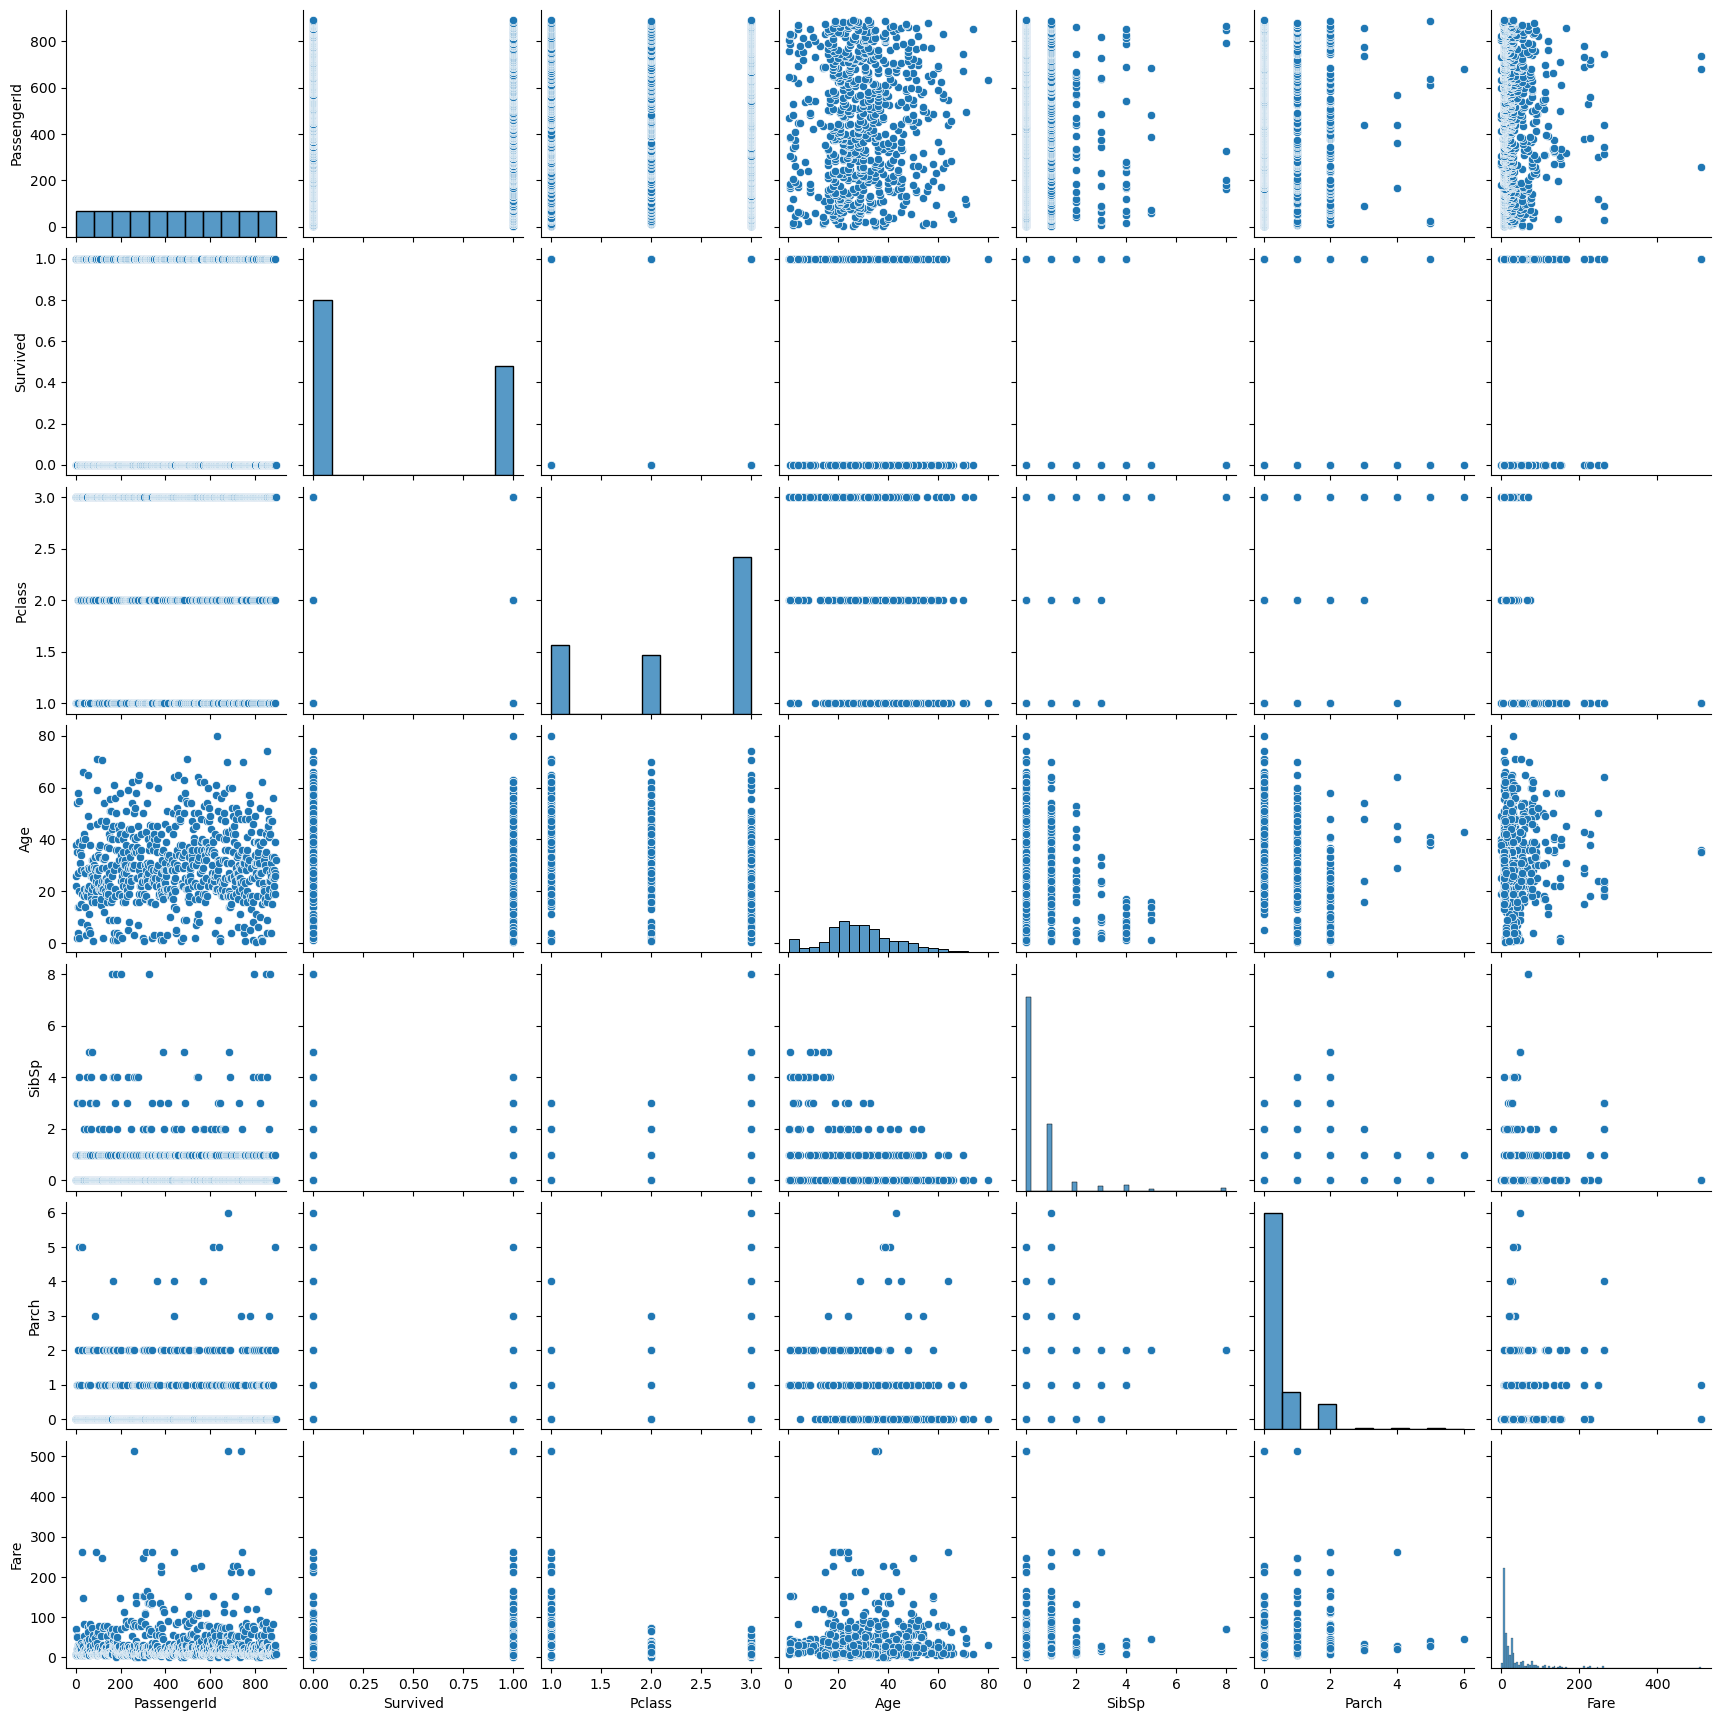

In [578]:
# Pairplot to visualize relationships between features
sns.pairplot(titanic_data)
plt.show()

<h1><b> 3. Data Preprocessing </b></h1>

After executing the following function I see that I have the following missing values:
<ol>
    <li>Age - Total Missing values are 177</li>
    <li>Cabin - Total Missing Values are 687 (Since it's not significant to the process it will be dropped)</li>
    <li>Embarked - Total Missing Values are 2 </li>
</ol>

In [581]:
# Pandas Function to Check for Missing Values in the Dataset
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [582]:
# First Drop the Columns Unrelated to the Analysis
# 'axis =1' indicates that columns (not rows are being dropped)

titanic_data=titanic_data.drop(columns=['PassengerId', 'Name', 'Cabin', 'Ticket'], axis=1)
titanic_data.head()

# Here we've handled the missing value 'Cabin'

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [583]:
# Now let's handle the 'age' missing values using median
# 'inplace=True' replaces the NaN values directly in the original DataFrame without creating a new copy

titanic_data['Age'].fillna(titanic_data['Age'].median(), inplace=True)

# Let's then display the null values in our dataset after dealing with age
titanic_data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [584]:
# Let's handle the final missing values of 'Embarked' using mode

titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0], inplace=True)

# Let's display the null values left in the DataFrame (In our Case there's none left)
titanic_data.isnull().sum()


Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

<h3><b>Organizing The Data Into a Presentable/Computable Format (Numerical Data)</b></h3>

In [586]:
'''
Let's start by converting the Genders into Binary Format
    male = 0
    female = 1
'''
titanic_data['Sex']=titanic_data['Sex'].replace({'male':0, 'female':1})
titanic_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,S
1,1,1,1,38.0,1,0,71.2833,C
2,1,3,1,26.0,0,0,7.9250,S
3,1,1,1,35.0,1,0,53.1000,S
4,0,3,0,35.0,0,0,8.0500,S


In [587]:
'''
We continue to assign the 'Embarked' values into numerical format
    C - 1
    S - 2
    Q - 3
'''
titanic_data['Embarked']=titanic_data['Embarked'].replace({'C':1,'S':2,'Q':3})
titanic_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,2
1,1,1,1,38.0,1,0,71.2833,1
2,1,3,1,26.0,0,0,7.9250,2
3,1,1,1,35.0,1,0,53.1000,2
4,0,3,0,35.0,0,0,8.0500,2


<h3><b>Finding the Correlation of the Features in the DataSet</b></h3>
<ol style="font-size:16px;">
    <li>
        The `corr()` method in <b>Pandas Library</b> calculates the correlation coefficients between the numerical columns in the DataFrame.<br>
        Correlation coefficients measure the strength and direction of a linear relationship between two variables.
    </li>
    <li>
       The output is a new DataFrame (<b>correlation matrix</b>) where:<br>
       Each row and column corresponds to a numerical feature in the original DataFrame. 
    </li>
    <li>
      The values in the matrix range from -1 to 1:<br>
      <b>1</b> indicates a perfect positive correlation (as one variable increases, the other also increases).<br>
      <b>-1</b> indicates a perfect negative correlation (as one variable increases, the other decreases).<br>
      <b>0</b> indicates no correlation (no linear relationship between the variables).  
    </li>
</ol>


In [589]:
# Let's Now Find the correlation of the features in our dataset
"""
Correlation with 'Survived' Column Example:
'Survived' and 'Pclass'

    Correlation = -0.338481
    
    Interpretation: This data indicates that there's moderate negative correlation; 
    meaning as the passenger class (Pclass) increases (from 1st to 3rd class), the likelihood of survival decreases. 
    Higher-class passengers (1st class) tended to have a higher survival rate compared to lower-class passengers (3rd class).
"""
titanic_data.corr()


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,1.000000,-0.338481,0.543351,-0.064910,-0.035322,0.081629,0.257307,-0.125953
Pclass,-0.338481,1.000000,-0.131900,-0.339898,0.083081,0.018443,-0.549500,0.305762
Sex,0.543351,-0.131900,1.000000,-0.081163,0.114631,0.245489,0.182333,-0.022521
Age,-0.064910,-0.339898,-0.081163,1.000000,-0.233296,-0.172482,0.096688,-0.040166
SibSp,-0.035322,0.083081,0.114631,-0.233296,1.000000,0.414838,0.159651,0.030874
Parch,0.081629,0.018443,0.245489,-0.172482,0.414838,1.000000,0.216225,-0.035957
Fare,0.257307,-0.549500,0.182333,0.096688,0.159651,0.216225,1.000000,-0.268865
Embarked,-0.125953,0.305762,-0.022521,-0.040166,0.030874,-0.035957,-0.268865,1.000000


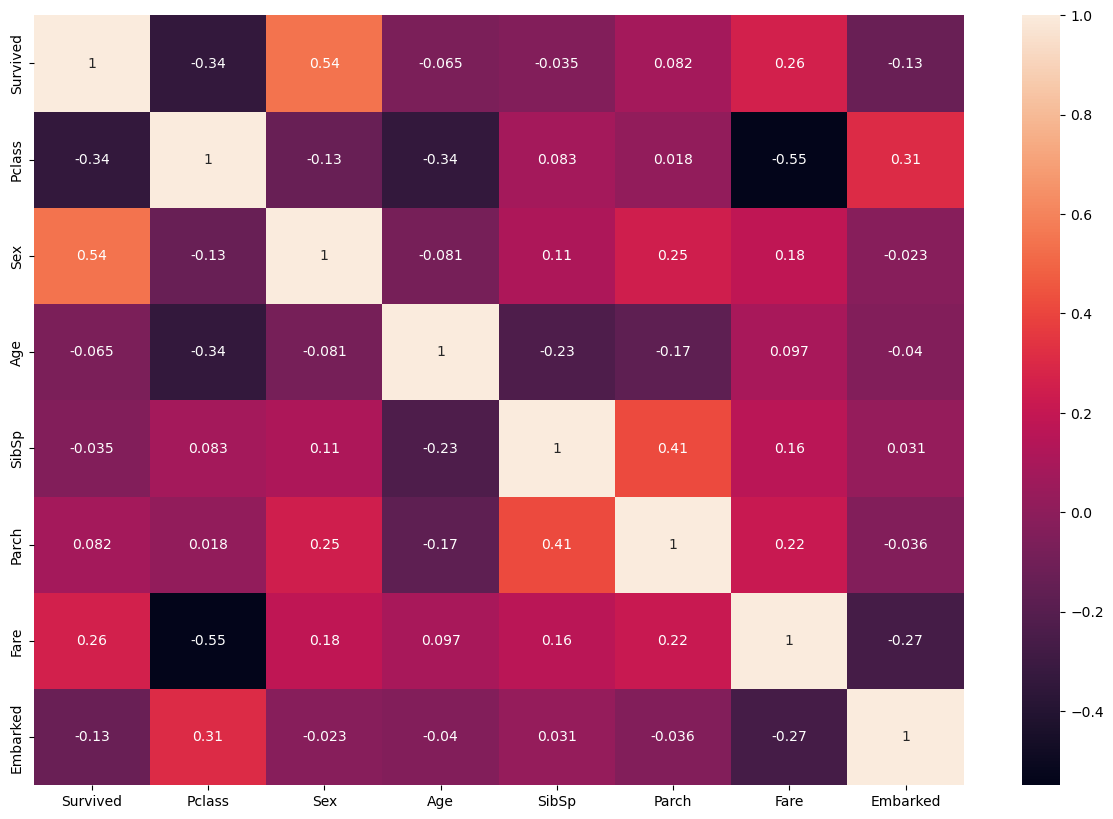

In [590]:
# Let's now plot the correlations in a heat map to visualize the findings using the seaborn library
"""
'plt.figure(figsize=(15,10))' - initializes the new figure with a specified size of 15 inches(width) by 10 inches (height)
'sns.heatmap(...)' - creates the heatmap visualization of the correlation matrix
'annot=True' - adds the coefficient values as annotations on the heatmap cells for easier interpretation
"""
plt.figure(figsize=(15,10))
sns.heatmap(titanic_data.corr(), annot=True)
plt.show()

<h1><b>4. Feature Engineering </b></h1>

In [1221]:
# Let's prepare the features (independent variables) and the target variable (dependent variables) which is 'survived' column

"""
- The following code line creates a new DataFrame 'x' that contains all others features except for the 'Survived' column.
- The resulted DataFrame 'x' will be used as input for the machine learning model.
"""
titanic_data['FamilySize'] = titanic_data['SibSp'] + titanic_data['Parch'] + 1
    
x=titanic_data.drop(columns=['Survived'])

# The following code will create a new series 'y' (containing 'survived' only) - Target Variable 
# that the model will learn to predict based on the features in `x`
y=titanic_data['Survived']

In [1223]:
# Let's now scale the features of the Dataframe 'x' using the Min-Max scaling technique

"""
'scaler=MinMaxScaler()' - creates an instance of the MinMxScaler class from the sklearn.preprocessing module
'x=scaler.fit_transform(x)' - method that computes the minimum and maximum values of each feature in 'x' 
                                and transforms the data by scaling it to the range [0,1].
"""
scaler=MinMaxScaler()
x=scaler.fit_transform(x)


In [1225]:
# Let's now reshape the target variable 'y' array into a 2D-Array  
"""
'y.values' - Assesses the underlying array of the 'y' variable and returns the data as a NumPy array
'reshape(-1,1)' - Used to shape the NumPy array received;
                Arguement '-1' - indicates that the number of rows should be inferred automatically based on the total elements in the array
                Arguement '1' - specifies that the reshaped array should have one column
"""
y=y.values.reshape(-1,1)

<h3><b>Splitting The Dataset into Training and Testing subsets for Machine Learning Model</b></h3>

<ol style="font-size:16px;">
    <li>
       `train_test_split(...)` - This function is imported from the `sklearn.model_selection` module and is used to randomly split arrays or matrices into two subsets:<br>
        one for training the model and the other for testing its performance. 
    </li>
    <li>
        `test_size=0.2` - This parameter specifies the proportion of the dataset to include in the test split.<br>
        In this case,<b>20%</b> of the data will be allocated to the <b>test set</b>, while the remaining <b>80%</b>will be used for <b>training.</b>
    </li>
    <li>
        `shuffle=True` - This parameter indicates that the data should be shuffled before splitting.<br>
        Shuffling is important to ensure that the training and testing sets are representative of the overall dataset and to avoid any bias that might arise from the order of the data.
    </li>
    <li>
        `random_state=42` - This parameter sets a seed for the random number generator used for shuffling.<br> 
        By specifying a random state (in this case, 42), you ensure that the split is reproducible.<br> 
        This means that every time you run the code with the same random state, you will get the same training and testing sets.
    </li>
    <li>
        X_train, X_test, y_train, y_test` - These variables are the outputs of the `train_test_split` function.<br>
           - `X_train` contains the training features.<br>
           - `X_test` contains the testing features.<br>
           - `y_train` contains the training target values.<br>
           - `y_test` contains the testing target values.
    </li>
</ol>

In [1366]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,shuffle=True,random_state=42)

<h1><b>5. Model Building and Training</b></h1>

<p style="font-size:15px">
    I choose Logistic Regression statistical machine learning model since in our case we are dealing with binary outcomes.<br>
    Where, we need to predict whether a passenger survived (1) or not (0)
</p>

In [1423]:
# Let's create a logistic regression model
"""
`LogisticRegression(...)`: This creates an instance of the logistic regression model.

`penalty="l1"`: This specifies the type of regularization to apply. 
    "l1" refers to L2 regularization (also known as Ridge regularization), 
    which helps prevent overfitting by adding a penalty for larger coefficients.
    
`max_iter=2000`: This sets the maximum number of iterations for the optimization algorithm to converge. 
    A higher value can be useful if the model is not converging within the default number of iterations (which is usually 100).
    
`solver="lbfgs"`: This specifies the optimization algorithm to use for fitting the model. 
    "lbfgs" is a popular choice for logistic regression, especially for smaller datasets.
    But for my case since we are dealing with binary outcomes i'll use "liblinear"
    
'tol'parameter sets the tolerance for stopping criteria. A smaller value can lead to more precise convergence.
"""
lg = LogisticRegression(random_state=0, penalty="l2", max_iter=1000, solver="liblinear", tol=6e-3)

# Fitting the model with Training Data and Training it
lg.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=0, solver='liblinear', tol=0.006)

In [1398]:
# Model Tuning
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
  }
grid = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear']})

In [1400]:
#`score` method compares the predicted values generated by the model using `X_train` against the actual values in `y_train`, 
# returning a score (often the accuracy) that indicates how well the model performs on the training data.

lg.score(X_train,y_train)


0.8019662921348315

In [1402]:
# Let's now generate predictions from our model
#  predict() method is called on the lg object with the test data X_test as an argument which generates predictions.
y_pred=lg.predict(X_test)
print(accuracy_score(y_test,y_pred))

0.7988826815642458


<h1><b>6. Model Evaluation using Confusion Matrix</b></h1>
<p style="font-size:16px;">A confusion matrix is a table that is used to evaluate the performance of a classification model. You can also visualize the performance of an algorithm.<br> The fundamental part of a confusion matrix is the number of correct and incorrect predictions summed up class-wise.</p>

In [1405]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
confusion_matrix

# In our case we see 92 and 51 are correct predictions while 13 and 23 are incorrect predictions.

array([[92, 13],
       [23, 51]], dtype=int64)

Text(0.5, 427.9555555555555, 'Predicted label')

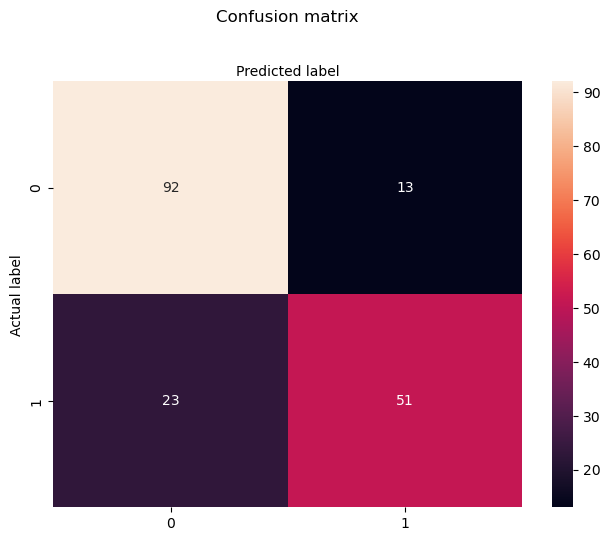

In [1407]:
# Let's plot the confusion matrix using seaborn and matplotlib libraries
class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# Creating the heatmap using seaborn

sns.heatmap(pd.DataFrame(confusion_matrix), annot=True, fmt='g')

#xaxis label is set on top using the following methos
ax.xaxis.set_label_position("top") 

# Method to tighten the plotted figure using the following method
plt.tight_layout()

plt.title('Confusion matrix', y=1.12)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

<h3><b>Evaluation Metrics</b></h3>
<p style="font-size:16px">Let's evaluate the model using classification_report for accuracy, precision, and recall.</p>

In [1410]:
target_names=["Didn't Die","Died"]
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

  Didn't Die       0.80      0.88      0.84       105
        Died       0.80      0.69      0.74        74

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179



<h3><b>Receiver Operating Characteristic (ROC) Curve</b></h3>
<p style="font-size:16px;"> 
 Its a plot of the true positive rate against the false positive rate. It shows the tradeoff between sensitivity and specificity.
</p>

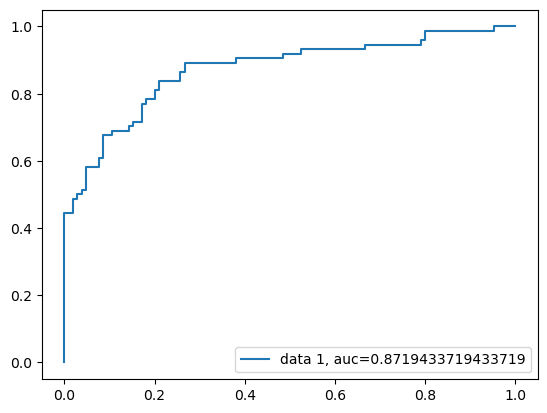

In [1416]:
"""
    Plots the ROC curve for the given true labels and predicted probabilities.
    
    Arguments:
    y_test (np.ndarray): True labels for the test set.
    y_pred_proba (np.ndarray): Predicted probabilities 
"""

y_pred_proba = lg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

<h1><b>7. Conclusion</b></h1>

<p style="font-size:16px;">
    This Data Science project successfully employed logistic regression to predict the survival of passengers on the Titanic. By analyzing various factors such as age, gender, class, and fare, the model achieved an impressive 80% accuracy in classifying passengers as survivors or fatalities. The ROC curve analysis further validated the model's performance, with an AUC score of 0.8719, indicating a high degree of discrimination between the two classes.
</p>
<p style="font-size:16px;">
   <b>Key Findings</b> 
</p>
<ol style="font-size:16px;">
    <li>Logistic Regression Model: The logistic regression model proved effective in predicting survival based on the given features.</li><br>
    <li>Evaluation Metrics: The model achieved an overall accuracy of 80%, demonstrating its ability to correctly classify passengers.</li><br>
    <li> ROC Curve Analysis: The AUC score of 0.8719 indicates strong performance in distinguishing survivors from non-survivors.</li><br>
    <li>Data Visualization: Seaborn and matplotlib were instrumental in understanding the distributions of features and their relationships.</li><br>
    <li>Data Preprocessing: Effective handling of missing data ensured data quality and model reliability.</li>
</ol>
    